# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

OpenWeatherMap Data

In [193]:

city = input()
url = "https://api.openweathermap.org/data/2.5/weather"
params = {
    #"id": "524901",
    "q":city,
    "units":"metric",
    "appid": "d7f9a1a58aafc08d64d4f2076ce20004"
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print("❌ Error", response.status_code)
    print(response.text)

{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 20.66, 'feels_like': 20.17, 'temp_min': 19.45, 'temp_max': 22.3, 'pressure': 1019, 'humidity': 53, 'sea_level': 1019, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 0.89, 'deg': 311, 'gust': 2.68}, 'clouds': {'all': 100}, 'dt': 1754145951, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB', 'sunrise': 1754108748, 'sunset': 1754164056}, 'timezone': 3600, 'id': 2643743, 'name': 'London', 'cod': 200}


Data adjusted to table

In [194]:
from pandas import json_normalize, to_datetime

data=(response.json())
df_old = json_normalize(data, sep="_")
print(df.columns)

Index(['cod', 'message', 'cnt', 'list', 'city_id', 'city_name',
       'city_coord_lat', 'city_coord_lon', 'city_country', 'city_population',
       'city_timezone', 'city_sunrise', 'city_sunset'],
      dtype='object')


In [195]:

url = "https://api.openweathermap.org/data/2.5/forecast"
params = {
    #"id": "524901",
    "q":city,
    "units":"metric",
    "appid": "d7f9a1a58aafc08d64d4f2076ce20004"
}

response2 = requests.get(url, params=params)

if response2.status_code == 200:
    data_forecast = response2.json()
    print(data_forecast)
else:
    print("❌ Error", response.status_code)
    print(response2.text)

{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1754146800, 'main': {'temp': 20.55, 'feels_like': 20.04, 'temp_min': 20.55, 'temp_max': 20.83, 'pressure': 1018, 'sea_level': 1018, 'grnd_level': 1014, 'humidity': 53, 'temp_kf': -0.28}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'clouds': {'all': 100}, 'wind': {'speed': 2.91, 'deg': 295, 'gust': 3.88}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2025-08-02 15:00:00'}, {'dt': 1754157600, 'main': {'temp': 20.5, 'feels_like': 19.86, 'temp_min': 20.39, 'temp_max': 20.5, 'pressure': 1018, 'sea_level': 1018, 'grnd_level': 1013, 'humidity': 48, 'temp_kf': 0.11}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'clouds': {'all': 86}, 'wind': {'speed': 1.91, 'deg': 318, 'gust': 4.98}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2025-08-02 18:00:00'}, {'dt': 1754168400, 'main': {'temp': 18.43, 'feels_like': 17

In [196]:
from pandas import json_normalize
print(response2.text)
data_forecast=(response2.json())
df = json_normalize(data_forecast, sep="_")
print(df.columns)

{"cod":"200","message":0,"cnt":40,"list":[{"dt":1754146800,"main":{"temp":20.55,"feels_like":20.04,"temp_min":20.55,"temp_max":20.83,"pressure":1018,"sea_level":1018,"grnd_level":1014,"humidity":53,"temp_kf":-0.28},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"clouds":{"all":100},"wind":{"speed":2.91,"deg":295,"gust":3.88},"visibility":10000,"pop":0,"sys":{"pod":"d"},"dt_txt":"2025-08-02 15:00:00"},{"dt":1754157600,"main":{"temp":20.5,"feels_like":19.86,"temp_min":20.39,"temp_max":20.5,"pressure":1018,"sea_level":1018,"grnd_level":1013,"humidity":48,"temp_kf":0.11},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"clouds":{"all":86},"wind":{"speed":1.91,"deg":318,"gust":4.98},"visibility":10000,"pop":0,"sys":{"pod":"d"},"dt_txt":"2025-08-02 18:00:00"},{"dt":1754168400,"main":{"temp":18.43,"feels_like":17.74,"temp_min":17.37,"temp_max":18.43,"pressure":1018,"sea_level":1018,"grnd_level":1014,"humidity":54,"temp_kf

DF_WEATHER

In [197]:
import pandas as pd
weather=[]
for forecast in data_forecast["list"]:
    time = forecast["dt_txt"]
    temp = forecast["main"]["temp"]
    humidity=forecast["main"]["humidity"]
    description = forecast["weather"][0]["description"]
    wind_speed = forecast["wind"]["speed"]
    feels_like = forecast["main"]["feels_like"]
    wind_direction = forecast["wind"]["deg"]
    clouds = forecast["clouds"]["all"]
    print(time, temp, description, humidity,wind_speed)
    weather.append([time, temp, description, humidity,wind_speed,feels_like,wind_direction,clouds])
    df_weather = pd.DataFrame(weather, columns=["time", "temp", "description", "humidity", "wind_speed", "feels_like", "wind_direction", "clouds"])


2025-08-02 15:00:00 20.55 overcast clouds 53 2.91
2025-08-02 18:00:00 20.5 overcast clouds 48 1.91
2025-08-02 21:00:00 18.43 broken clouds 54 2.62
2025-08-03 00:00:00 15.5 scattered clouds 58 2.38
2025-08-03 03:00:00 13.61 clear sky 64 2.22
2025-08-03 06:00:00 15.75 broken clouds 65 2.98
2025-08-03 09:00:00 19.41 overcast clouds 57 3.64
2025-08-03 12:00:00 24.88 overcast clouds 54 4.48
2025-08-03 15:00:00 24.58 light rain 61 4.94
2025-08-03 18:00:00 22.22 light rain 76 4.2
2025-08-03 21:00:00 19.87 overcast clouds 74 2.89
2025-08-04 00:00:00 18.67 overcast clouds 70 1.64
2025-08-04 03:00:00 17.36 overcast clouds 69 1.63
2025-08-04 06:00:00 17.45 overcast clouds 78 3
2025-08-04 09:00:00 20.95 overcast clouds 71 5.5
2025-08-04 12:00:00 23.78 overcast clouds 66 7.1
2025-08-04 15:00:00 20.89 light rain 81 6.28
2025-08-04 18:00:00 19.33 light rain 85 4.23
2025-08-04 21:00:00 17.8 light rain 54 3.56
2025-08-05 00:00:00 15.84 scattered clouds 59 3.5
2025-08-05 03:00:00 14.21 scattered clouds 

PLOTS FUNCTIONS

In [199]:
#df_weather['time']
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot_weather(df_weather,variable='temp'):
 df_weather['time']=pd.to_datetime(df_weather['time'])
 now=pd.Timestamp.now()
 next_week=now+pd.Timedelta(days=7)
 df_week=df_weather[(df_weather['time']<=next_week) & (df_weather['time']>=now)].copy()
 plt.figure(figsize=(16,6))
 sns.lineplot(data=df_week, x='time', y=variable, marker='o')
 plt.title(f'{variable.capitalize()} Forecast Next 7 Days')
 plt.grid(True)
 plt.xlabel('Datetime')
 plt.ylabel(variable)
 plt.tight_layout()
 plt.xticks(rotation=90)
 plt.show()



In [200]:
def plot_weather_3_charts(df_weather,variables):
 df_weather['time']=pd.to_datetime(df_weather['time'])
 now=pd.Timestamp.now()
 next_week=now+pd.Timedelta(days=7)
 df_week=df_weather[(df_weather['time']<=next_week) & (df_weather['time']>=now)].copy()

 fig, axes = plt.subplots(len(variables),1,figsize=(16,6*len(variables)),sharex=True)
 if len(variables)==1:
     axes=[axes]
 for i, variable in enumerate(variables):
        sns.lineplot(data=df_week, x='time', y=variable,ax=axes[i], marker='o')
        axes[i].set_title(variable.capitalize())
        axes[-1].set_xlabel('Datetime')
        axes[i].grid(True)
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

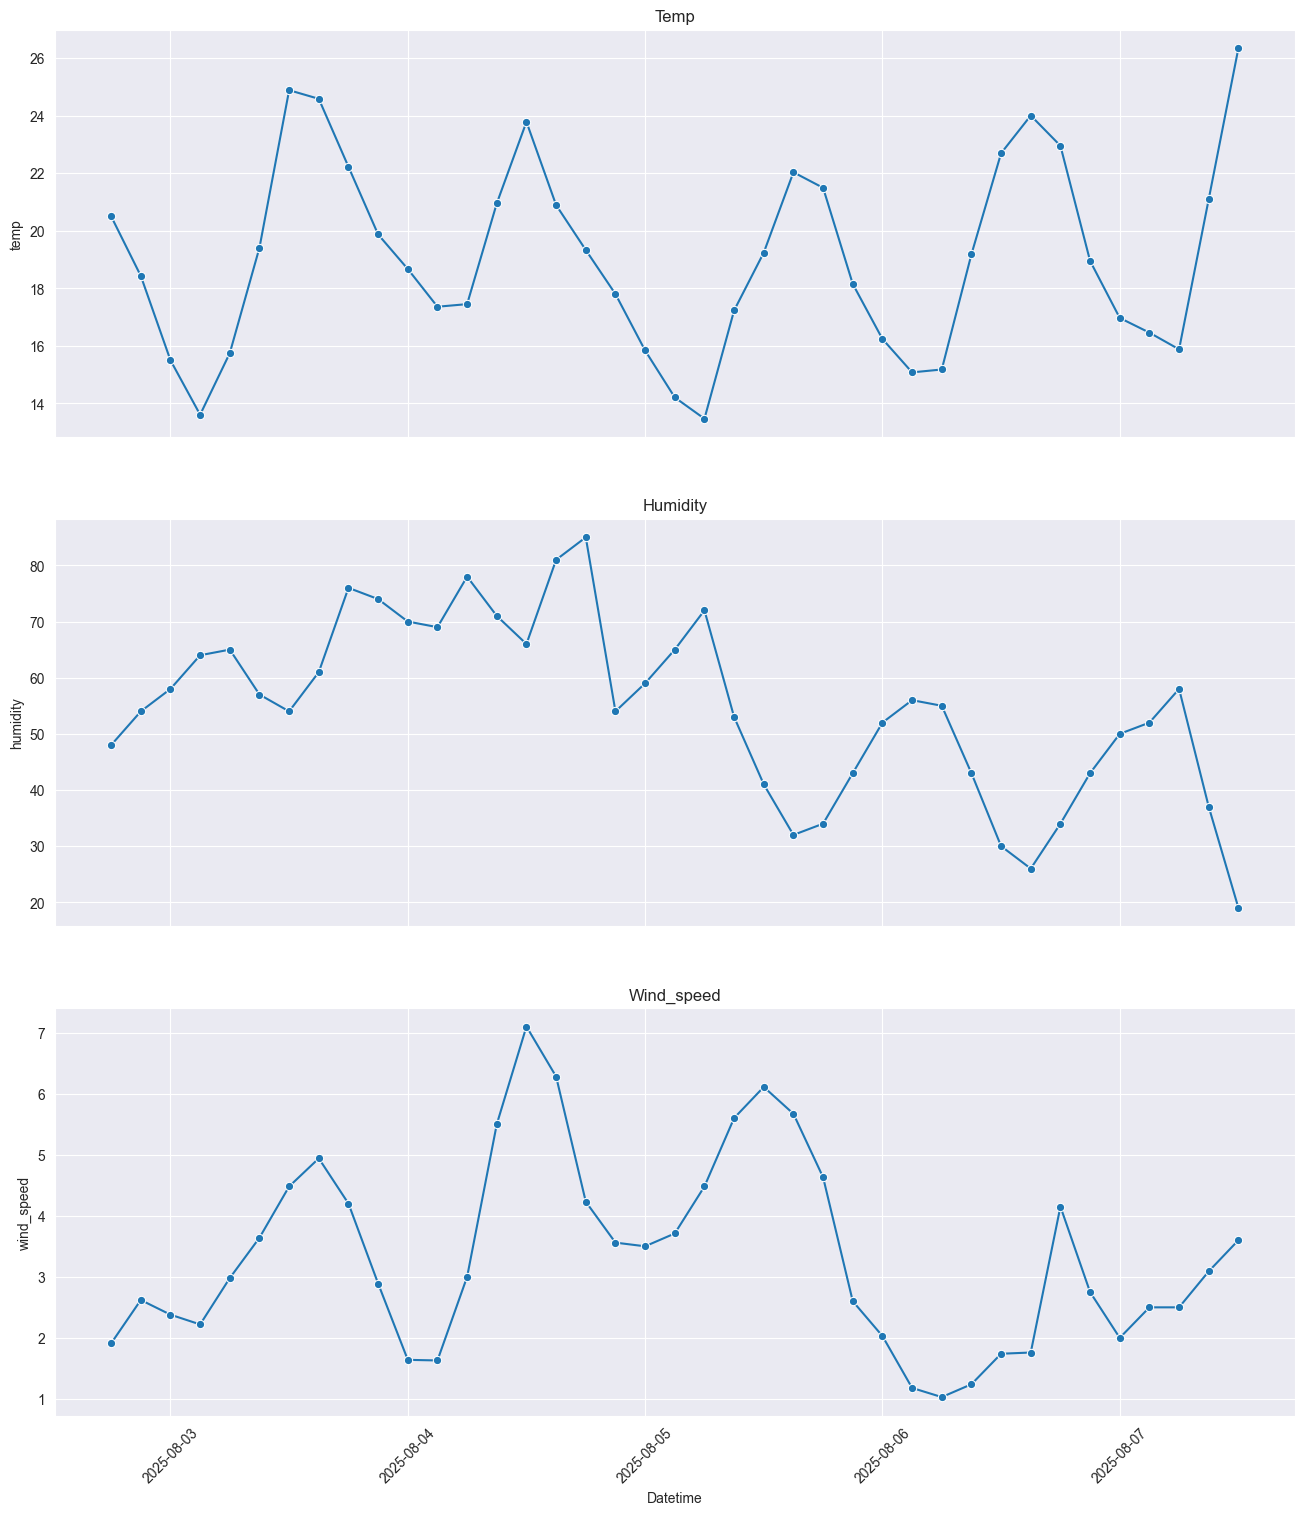

In [201]:
 #plot_weather(df_weather,'humidity')
 plot_weather_3_charts(df_weather,['temp','humidity',"wind_speed"])

DAY NIGHT FUNCTION

In [202]:
def agg_day_night (df_weather,variables):
    df_weather['hour']=df_weather['time'].dt.hour
    df_weather['period']=df_weather['hour'].apply(lambda h: 'Day' if 6<=h<18 else 'Night')
    df_weather['date']=df_weather['time'].dt.date
    agg =df_weather.groupby(['date','period'])[['temp','humidity']].mean().reset_index()
    return (agg)

In [203]:
variables=['temp','humidity']
agg=agg_day_night(df_weather,variables)
print(agg)

          date period       temp  humidity
0   2025-08-02    Day  20.550000     53.00
1   2025-08-02  Night  19.465000     51.00
2   2025-08-03    Day  21.155000     59.25
3   2025-08-03  Night  17.800000     68.00
4   2025-08-04    Day  20.767500     74.00
5   2025-08-04  Night  18.290000     69.50
6   2025-08-05    Day  17.992500     49.50
7   2025-08-05  Night  17.422500     50.25
8   2025-08-06    Day  20.262500     38.50
9   2025-08-06  Night  18.305000     46.25
10  2025-08-07    Day  21.106667     38.00
11  2025-08-07  Night  16.715000     51.00


In [204]:
df_weather['hour']=df_weather['time'].dt.hour
df_weather['period']=df_weather['hour'].apply(lambda h: 'Day' if 6<=h<18 else 'Night')
df_weather['date']=df_weather['time'].dt.date
agg =df_weather.groupby(['date','period'])[['temp','humidity']].mean().reset_index()
print(agg)

          date period       temp  humidity
0   2025-08-02    Day  20.550000     53.00
1   2025-08-02  Night  19.465000     51.00
2   2025-08-03    Day  21.155000     59.25
3   2025-08-03  Night  17.800000     68.00
4   2025-08-04    Day  20.767500     74.00
5   2025-08-04  Night  18.290000     69.50
6   2025-08-05    Day  17.992500     49.50
7   2025-08-05  Night  17.422500     50.25
8   2025-08-06    Day  20.262500     38.50
9   2025-08-06  Night  18.305000     46.25
10  2025-08-07    Day  21.106667     38.00
11  2025-08-07  Night  16.715000     51.00


TOP PAGE DATA

In [206]:
def main_data (df_old):
 from datetime import datetime
 import pandas as pd
 city_name=df_old['name']
 country=df_old['sys_country']
 df_old['dt']=pd.to_datetime(df_old['dt'],unit='s')
 date=df_old['dt'].dt.date
 temperature= df_old['main_temp']
 humidity= df_old['main_humidity']
 wind_speed= df_old['wind_speed']
 sunrise= datetime.fromtimestamp(df_old['sys_sunrise'].iloc[0])
 sunset= datetime.fromtimestamp(df_old['sys_sunset'].iloc[0])

 print(f"City: {city_name}, Country: {country}, Date: {date}, Temp: {temperature}°C, Humidity: {humidity}%, Wind: {wind_speed} m/s, Sunrise: {sunrise}, Sunset: {sunset}")



In [218]:
df_old.columns

Index(['weather', 'base', 'visibility', 'dt', 'timezone', 'id', 'name', 'cod',
       'coord_lon', 'coord_lat', 'main_temp', 'main_feels_like',
       'main_temp_min', 'main_temp_max', 'main_pressure', 'main_humidity',
       'main_sea_level', 'main_grnd_level', 'wind_speed', 'wind_deg',
       'wind_gust', 'clouds_all', 'sys_type', 'sys_id', 'sys_country',
       'sys_sunrise', 'sys_sunset'],
      dtype='object')

2 VAR FUNCTION (FEELS_LIKE VS TEMP)

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_two_weather_vars(df, x_col, y1_col, y2_col):
    plt.figure(figsize=(14, 6))

    df[x_col] = pd.to_datetime(df[x_col])

    sns.lineplot(data=df, x=x_col, y=y1_col, label=y1_col, marker='o')
    sns.lineplot(data=df, x=x_col, y=y2_col, label=y2_col, marker='s')

    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title(f"{y1_col} and {y2_col} over Time")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


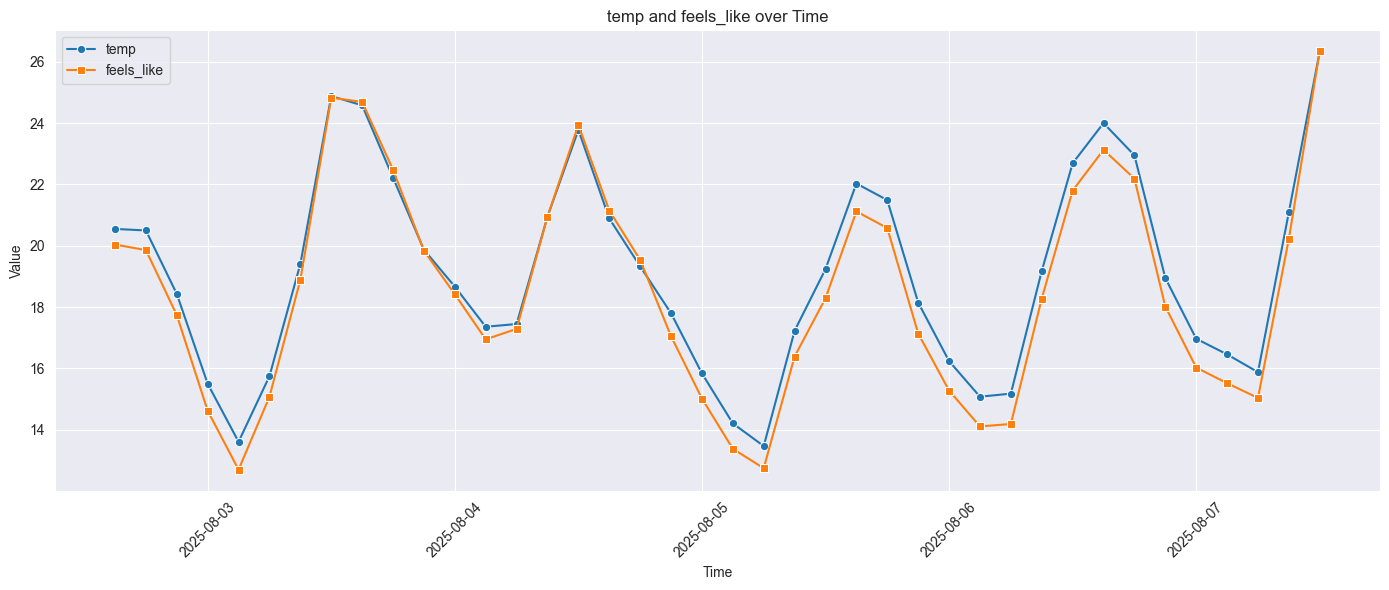

In [209]:
plot_two_weather_vars(df_weather, "time", "temp", "feels_like")


HEATMAP

<Axes: xlabel='hour', ylabel='day'>

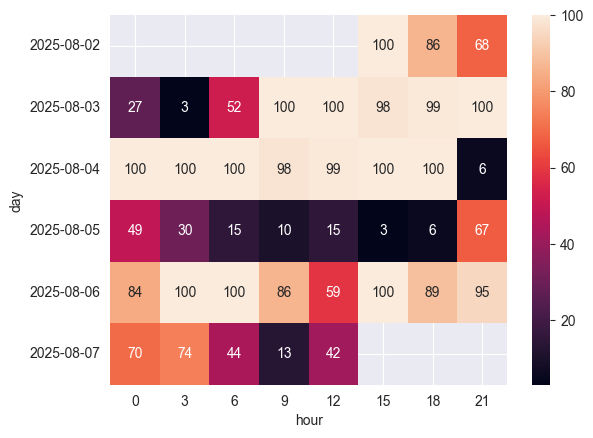

In [213]:
df_weather['time'] = pd.to_datetime(df_weather['time'])
df_weather['day'] = df_weather['time'].dt.date
df_weather['hour'] = df_weather['time'].dt.hour
cloud_matrix = df_weather.pivot(index='day', columns='hour', values='clouds')
sns.heatmap(cloud_matrix, annot=True, fmt="g")

STREAMLIT

In [225]:
import streamlit as st
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

st.title("🌤️ Weather App")

st.write("Enter a city name to get weather forecast")

city = st.text_input("City name:", value="London")

if st.button("Get Current Weather"):
    if city:
        st.write(f"Searching weather for: {city}")

        url = "https://api.openweathermap.org/data/2.5/weather"
        params = {
            "q": city,
            "units": "metric",
            "appid": "d7f9a1a58aafc08d64d4f2076ce20004"
        }

        try:
            response = requests.get(url, params=params)

            if response.status_code == 200:
                data = response.json()
                st.success("✅ Data received successfully!")
#top page
                main_city_name = data['name']
                main_country = data['sys']['country']
                main_date = datetime.fromtimestamp(data['dt']).date()
                main_temperature = data['main']['temp']
                main_humidity = data['main']['humidity']
                main_wind_speed = data['wind']['speed']
                main_wind_direction = data['wind']['deg']
                main_sunrise = datetime.fromtimestamp(data['sys']['sunrise'])
                main_sunset = datetime.fromtimestamp(data['sys']['sunset'])
                main_feels_like = data['main']['feels_like']
                main_pressure = data['main']['pressure']

                # Display with columns
                col1, col2, col3, col4 = st.columns(4)

                with col1:
                    st.metric("City", main_city_name)
                    st.metric("Country", main_country)

                with col2:
                    st.metric("Date", str(main_date))
                    st.metric("Temperature", f"{main_temperature}°C")

                with col3:
                    st.metric("Feels Like", f"{main_feels_like}°C")
                    st.metric("Humidity", f"{main_humidity}%")

                with col4:
                    st.metric("Wind Speed", f"{main_wind_speed} m/s")
                    st.metric("Pressure", f"{main_pressure} hPa")
                st.write("**Current Weather Data:**")
                st.json(data)

            else:
                st.error(f"❌ Error: {response.status_code}")
                st.write(response.text)

        except Exception as e:
            st.error(f"❌ Error: {e}")
    else:
        st.warning("⚠️ Please enter a city name")

# Add forecast functionality
st.markdown("---")
st.header("📊 5-Day Forecast")

if st.button("Get 5-Day Forecast"):
    if city:
        st.write(f"Searching forecast for: {city}")

        url = "https://api.openweathermap.org/data/2.5/forecast"
        params = {
            "q": city,
            "units": "metric",
            "appid": "d7f9a1a58aafc08d64d4f2076ce20004"
        }

        try:
            response = requests.get(url, params=params)

            if response.status_code == 200:
                data_forecast = response.json()
                st.success("✅ Forecast received successfully!")

                st.write("**Forecast Data:**")
                st.json(data_forecast)

                # Process data like in notebook
                weather = []
                for forecast in data_forecast["list"]:
                    time = forecast["dt_txt"]
                    temp = forecast["main"]["temp"]
                    humidity = forecast["main"]["humidity"]
                    description = forecast["weather"][0]["description"]
                    wind_speed = forecast["wind"]["speed"]
                    feels_like = forecast["main"]["feels_like"]
                    wind_direction = forecast["wind"]["deg"]
                    clouds = forecast["clouds"]["all"]

                    st.write(f"{time}: {temp}°C, {description}, Humidity: {humidity}%, Wind: {wind_speed} m/s")

                    weather.append([time, temp, description, humidity, wind_speed, feels_like, wind_direction, clouds])

                df_weather = pd.DataFrame(weather, columns=["time", "temp", "description", "humidity", "wind_speed", "feels_like", "wind_direction", "clouds"])

                st.write("**Processed Data:**")
                st.dataframe(df_weather)

            else:
                st.error(f"❌ Error: {response.status_code}")

        except Exception as e:
            st.error(f"❌ Error: {e}")
    else:
        st.warning("⚠️ Please enter a city name")




2025-08-02 19:27:42.037 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 19:27:42.038 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 19:27:42.039 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 19:27:42.040 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 19:27:42.041 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 19:27:42.043 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 19:27:42.044 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 19:27:42.045 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar